In [1]:
from user_ops import ft_inverse
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import math
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
sys.path.append(os.path.join('..', '..', 'keras_frac'))
from fractional_maxpooling import FractionalPooling2D

%matplotlib inline

os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '5'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

/opt/miniconda3/envs/tf1_13/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/tf1_13/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/tf1_13/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/tf1_13/lib/python3.7/site-packages/tensorflow/

EPOCHS = 1
BATCH_SIZE = 1
in_shape = [1,5,5,1]
ft = [3,3]
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(batch_input_shape=in_shape))
model.add(keras.layers.Conv2D(1, 3, activation='relu', padding='valid'))
model.add(keras.layers.Lambda(lambda x: ft_pool(x, ft, ft)))
model.add(keras.layers.Conv2D(1, 3, activation='relu', padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

data = np.ones(in_shape, dtype=np.float32)
#data[0,0,0,0] = 2.0
model.train_on_batch(data, y_train[0:1,:])

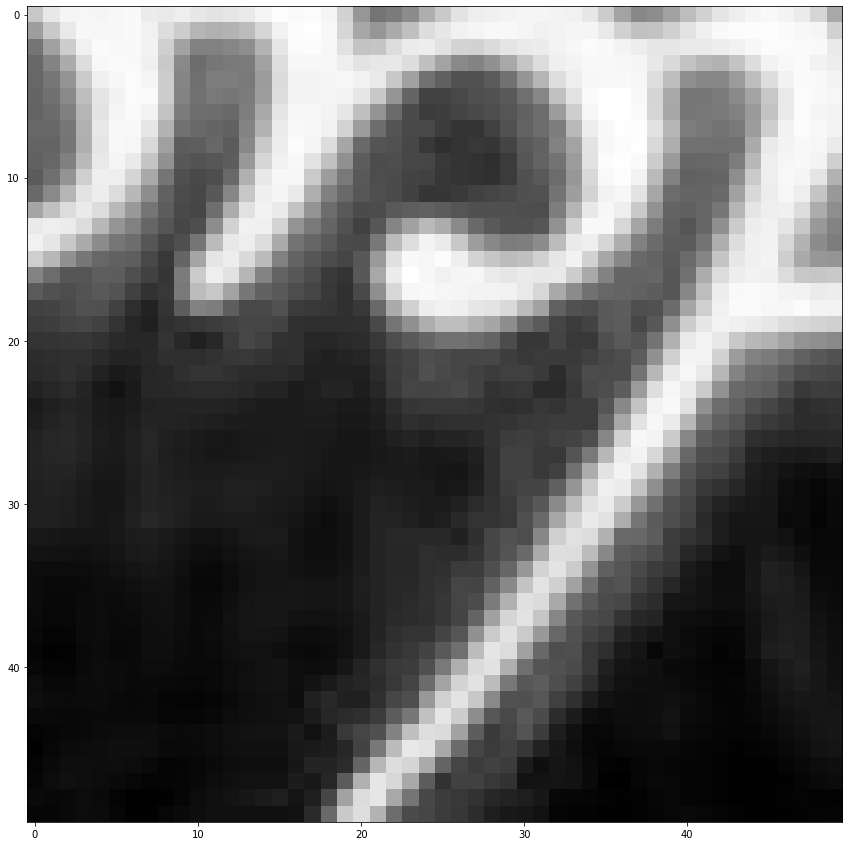

(1, 50, 50, 1)
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (1, 100, 100, 1)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
(1, 50, 50, 1) (1, 100, 100, 1)
3 97.5848 251
2 95.9827 251


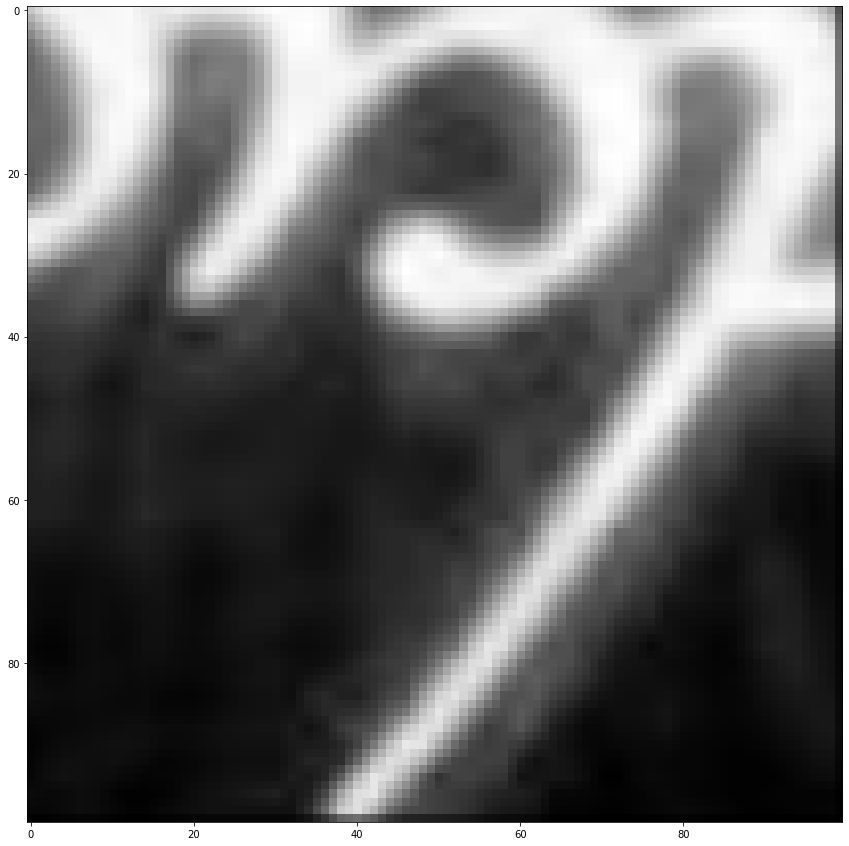

In [2]:
img = cv2.imread('/home/ravers/Downloads/lotr.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[400:450, 600:650]
'''
img = np.zeros([20,20])
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if x//6%2==0 and y//6%2==0:
            img[y,x] = 255
'''
plt.figure(figsize=(15,15))
plt.imshow(img, cmap='gray')
plt.show()
img = np.expand_dims(img, 0)
img = np.expand_dims(img, 3)
print(img.shape)
EPOCHS = 1
BATCH_SIZE = 1
in_shape = img.shape
stride = [2.0, 2.0]
pooling_window = [4.0, 4.0]
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(batch_input_shape=in_shape))
model.add(keras.layers.Lambda(lambda x: ft_inverse(x, stride, pooling_window)))
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
out = model.predict(img).astype(np.int32)
print(model.summary())
print(img.shape, out.shape)
print(img.min(), img.mean(), img.max())
print(out.min(), out.mean(), out.max())
plt.figure(figsize=(15,15))
plt.imshow(out[0,...,0], cmap='gray')
plt.show()

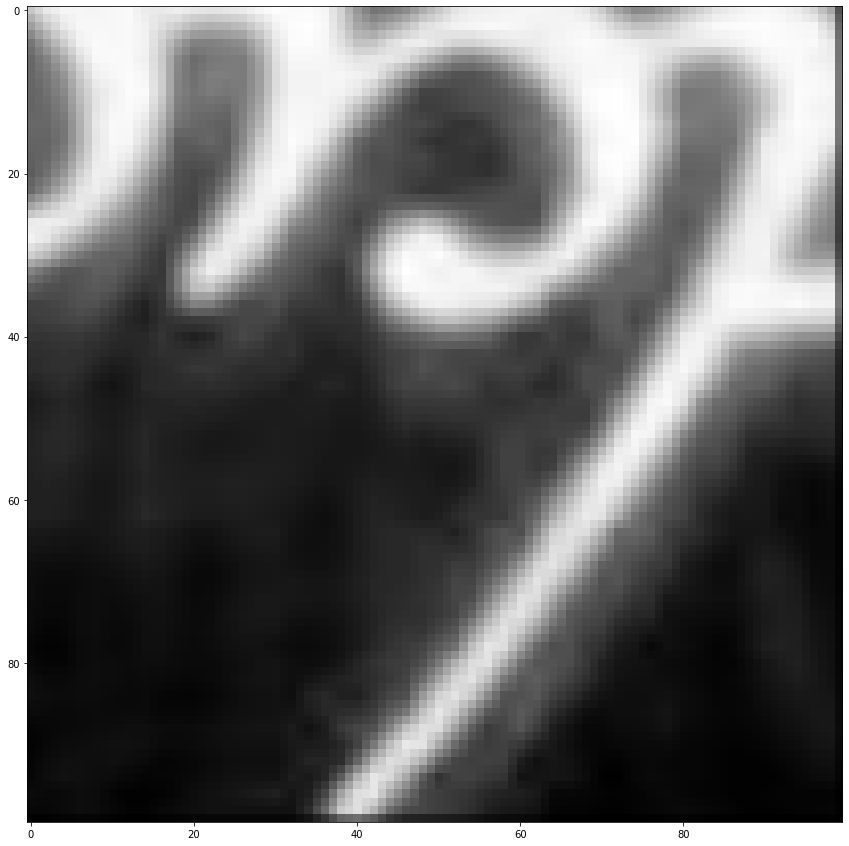

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(out[0,...,0], cmap='gray')
plt.show()